<a href="https://colab.research.google.com/github/Yannn25/NFL-2023-TD-QB-PREDICTIVE/blob/main/NFL_2023_TD_QB_PREDICTIVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NFL-2023-TD-QB-PREDICTIVE**

Ce projet a pour but de prédire le nombre de Touchdown lancer par les Quarterbacks de la NFL lors de la saison 2024 à venir(les quarterbacks qui ont jouer lors de la saison 2023, donc les rookies ne sont pas inclus).

Crédit support: https://www.youtube.com/watch?v=3IA0V9UuoPc&t=2s

In [3]:
# Importation des bibliothèques nécessaire
import os
import io
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests as rq

# Chargement des données (fichiers csv)
URL = "https://github.com/nflverse/nflverse-data/releases/download/pbp"
season_target = [ str(i) for i in range(2020,2023)]
df = pd.DataFrame()
for season in season_target :
  csv_url = f"{URL}/play_by_play_{season}.csv"
  print(f"Téléchargement de {csv_url}")
  #csv_file = pd.read_csv(csv_url)
  df = pd.concat([df, pd.read_csv(csv_url)], ignore_index=True)


# Le nombre de lignes et de colones total de notre Frame
print(df.shape)

# Maintenant, all_data contient toutes les données des saisons cibles, On peut afficher les 5 premières lignes pour vérifier
df.head()


['2020', '2021', '2022']
Téléchargement de https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_2020.csv


<ipython-input-3-c2651d8df1d6>:19: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,213,214,218,219,220,222,224,226,248,249,253,254,255,260,262,263,266,267,268,269,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv(csv_url)], ignore_index=True)


Téléchargement de https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_2021.csv


<ipython-input-3-c2651d8df1d6>:19: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,233,234,235,236,237,238,248,249,253,254,255,260,262,263,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv(csv_url)], ignore_index=True)


Téléchargement de https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_2022.csv


<ipython-input-3-c2651d8df1d6>:19: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,222,224,226,243,244,245,253,254,255,260,262,263,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv(csv_url)], ignore_index=True)


(149373, 372)


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,0,1,1.294838,0.50337,4.275047,2.0,0.619306,0.239695,0.515058,48.494154
3,93,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,0,1,0.857214,NaN,NaN,NaN,NaN,NaN,0.413357,-41.335732
4,118,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,0,1,-0.454665,NaN,NaN,NaN,NaN,NaN,0.446920,-44.692025


In [4]:
# Un apercu de 5 lignes aléatoires
df.sample(5)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
68359,2922,2021_08_GB_ARI,2021102800,ARI,GB,REG,8,GB,away,ARI,...,0,0,0.068571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2415,1986,2020_01_SEA_ATL,2020091300,ATL,SEA,REG,1,SEA,away,ATL,...,0,1,-0.575980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117184,2937,2022_07_KC_SF,2022102310,SF,KC,REG,7,KC,away,SF,...,0,1,-0.688592,0.532958,4.361949,3.0,0.978380,0.057614,0.758055,24.194491
64660,386,2021_06_MIA_JAX,2021101700,JAX,MIA,REG,6,MIA,away,JAX,...,0,0,0.998365,NaN,NaN,NaN,NaN,NaN,0.697079,30.292076
2509,4392,2020_01_SEA_ATL,2020091300,ATL,SEA,REG,1,ATL,home,SEA,...,0,1,2.411154,0.278230,5.574061,3.0,0.988482,0.988482,0.980476,1.952404


**Mise en place de notre modèle**


*   Quelle corrélation avec les touchdowns ?
*   Utiliser les yards et les performances de la saison précédente pour prédire les touchdowns ?

*Bien que ce dataset comporte de nombreux attributs différents, nous n’avons probablement pas besoin de tous les utiliser pour créer notre modèle prédictif. On devrait commencer par des données simples qui entre en jeu lors d'un lancer de touchdown d'un quarterback*



In [5]:
# On prend les caractéristiques essentiel pour un quarterback
qb_attr = ['season', 'passer_id', 'passer', 'pass',
            'complete_pass', 'interception',
            'sack', 'yards_gained', 'touchdown']
# Regrouper les par saisons et par passeurs
groupby_attr = ['season', 'passer_id', 'passer']

# On fait une aggrégation sur la somme des deux groupes précédent
qb_df = (df
         .loc[:, qb_attr]
         .groupby(groupby_attr,
                  as_index=False)
         .sum())

qb_df.sample(7)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown
117,2020,00-0036384,B.DiNucci,51,23.0,0.0,7.0,155.0,1.0
288,2022,00-0033319,N.Mullens,27,21.0,1.0,0.0,230.0,1.0
17,2020,00-0027150,J.Edelman,2,2.0,0.0,0.0,38.0,0.0
120,2021,00-0019596,T.Brady,879,544.0,13.0,29.0,5799.0,48.0
210,2021,00-0035040,D.Blough,2,0.0,0.0,1.0,0.0,0.0
18,2020,00-0027688,C.McCoy,78,40.0,1.0,5.0,366.0,1.0
76,2020,00-0033958,N.Peterman,8,3.0,0.0,2.0,18.0,0.0


# Tentons de voir quelles attributs nous pouvons mettre en corrélation avec le nombre de TD lancer par un QB

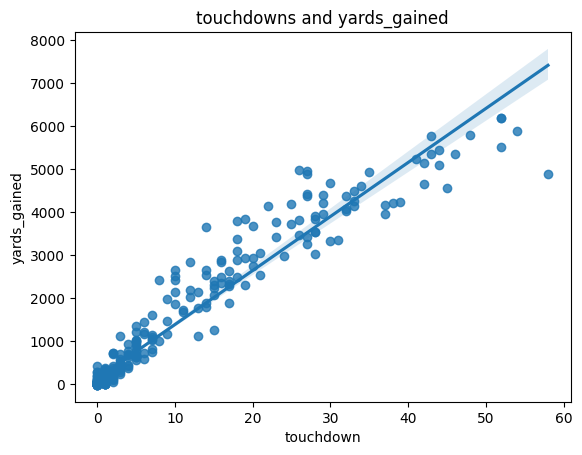

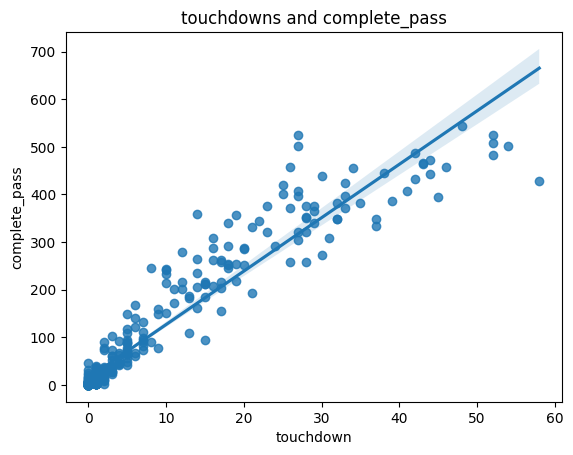

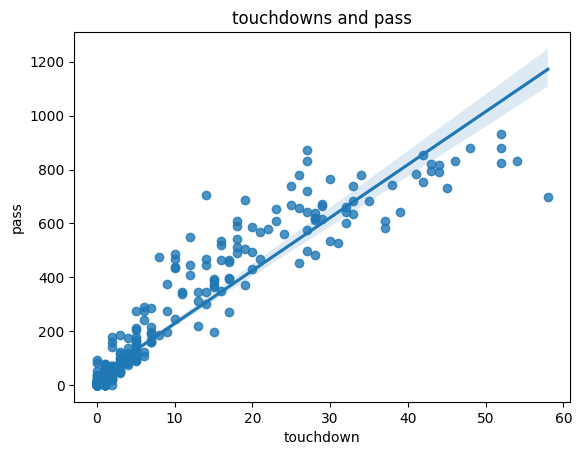

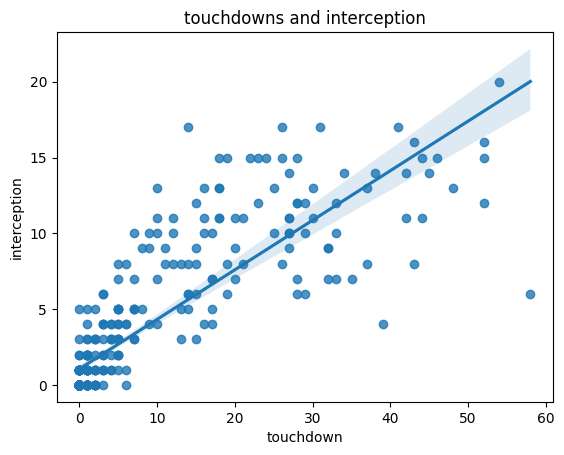

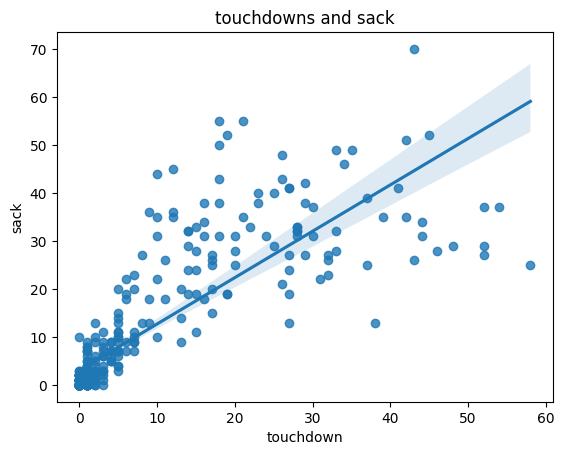

In [6]:
# Nous tracons une série de graphiques de régression
# (scatter plots avec une ligne de régression)
# en utilisant les données contenues dans qb_df.
# Nos abscices seront toujours le nombre de TD lancers,
# et nos ordonnées seront la colonne actuellement
# en cours d'itération dans la boucle for
for y in ['yards_gained', 'complete_pass',
          'pass', 'interception','sack']:
  sns.regplot(data=qb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")
  plt.show()

(débrif)

*En sachant que les passes complétes/tentées, les yards gagnées, les interceptions et les sacks subies peuvent avoir une incidence sur le nombre de TD lancers sur une saison; essayont de voir ce qui ce passe dans le cas de la saison d'après*

In [7]:
# On fait une copie de notre qb_df
cp_qb_df = qb_df.copy()

# On ajoute une nouvelles saison a notre copie
cp_qb_df['season'] = cp_qb_df['season'].add(1)

# Fusion de la copie et de l'original par une jointure gauche
new_qb_df = (qb_df
             .merge(cp_qb_df,
                    on=groupby_attr,
                    suffixes=('', '_prev'),
                    how='left'))
new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev
290,2022,00-0033537,D.Watson,214,99.0,5.0,20.0,1093.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
242,2021,00-0036972,M.Jones,640,376.0,15.0,31.0,3904.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
63,2020,00-0033251,Z.Pascal,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
122,2021,00-0022924,B.Roethlisberger,738,419.0,10.0,40.0,3724.0,25.0,743.0,446.0,14.0,13.0,4213.0,38.0
152,2021,00-0030578,C.Patterson,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
12,2020,00-0026197,C.Henne,53,34.0,1.0,3.0,317.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
19,2020,00-0027891,G.Tate,2,1.0,0.0,0.0,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
191,2021,00-0033936,C.Beathard,3,2.0,0.0,0.0,33.0,0.0,122.0,66.0,0.0,9.0,723.0,6.0
78,2020,00-0034177,T.Boyle,1,0.0,0.0,1.0,-11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
154,2021,00-0031136,C.Boswell,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


# Cette fois-ci on examiner les corrélations entre le nombre de touchdowns de la saison actuelle et la saison précédente

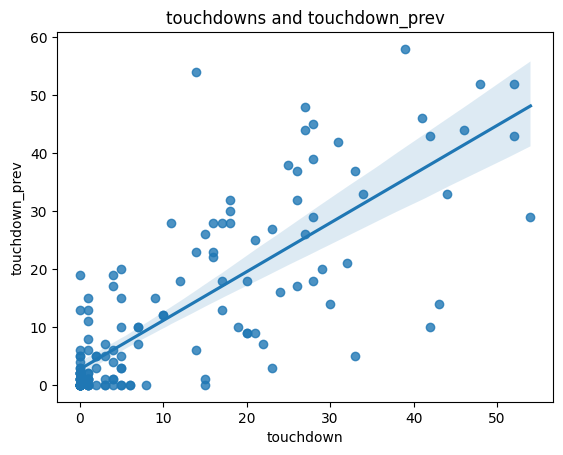

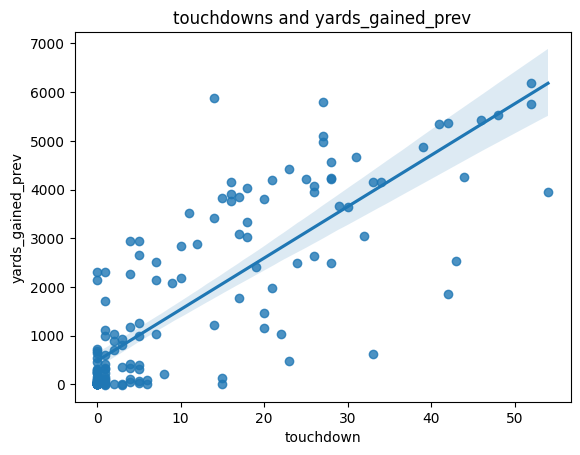

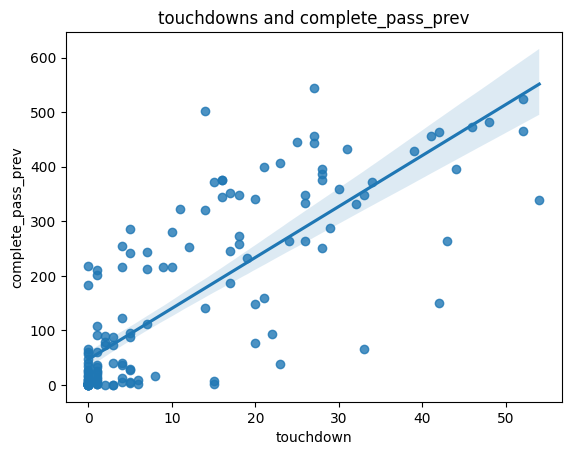

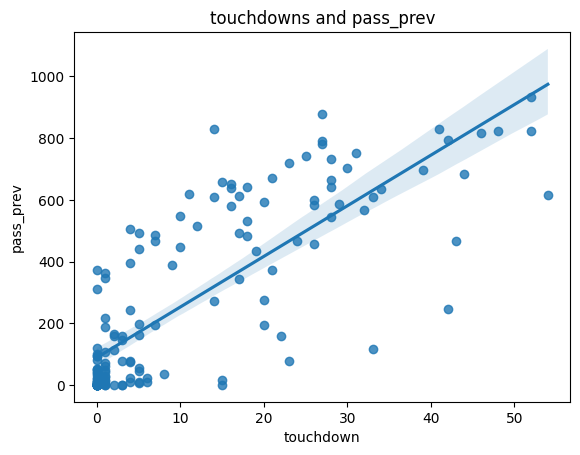

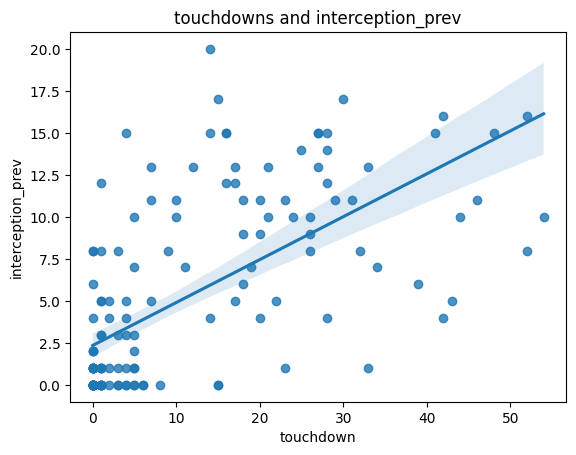

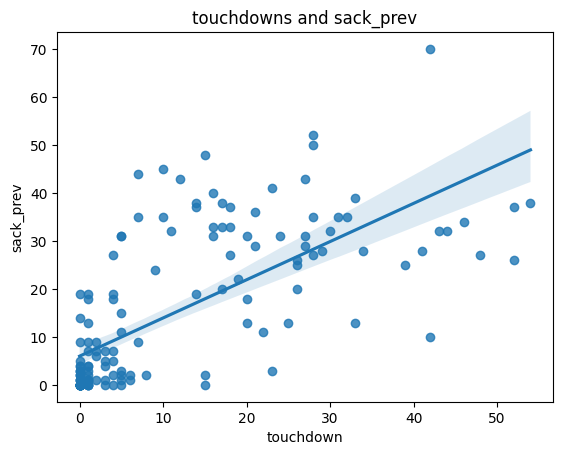

In [8]:
for y in ['touchdown_prev','yards_gained_prev',
          'complete_pass_prev', 'pass_prev',
          'interception_prev','sack_prev']:
  sns.regplot(data=new_qb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")
  plt.show()

*En utilisant les informations de la saison précédente, nous pouvons voir qu’il y a des corrélations d’année en année avec les touchdowns. Utilisons les performances de la saison précédente pour estimer les touchdowns prévus pour la prochaine saison*

**Machine Learning**


*   Modèle linéaire simple
*   Entrainement avec l'année précedente, et test sur l'année suivante
*   Enregistrer les résultats de test hors échantillon
*   Visualiser et exécuter des stats de base





In [12]:
from pandas.io.formats.style_render import Subset
# Importation des bibliothèques de machine learning et de statistique
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

# Maintenant on va "entrainer" notre modèle avec
# les données d'une saison, puis on va les "tester"
# sur la saison qui suit
model_attr = ['pass_prev', 'complete_pass_prev',
            'interception_prev', 'sack_prev',
            'yards_gained_prev', 'touchdown_prev']
# Ce  qu'on cherche a prédire(notre cible donc) depuis le début
# le nombre de TD.
cible = 'touchdown'

# Notre modèle ne doit pas inclure de valeur null
model_data = (new_qb_df
              .dropna(subset=model_attr+[cible]))

# Changer ici les saisons si besoin
train_data = (model_data.loc[model_data['season']==2021])

test_data = (model_data.loc[model_data['season']==2022])

# Initialisation de notre modèle Linéaire
model = LinearRegression()

# C'est ici qu'a lieu l'entrainement de notre modèle
model.fit(train_data.loc[:, model_attr], train_data[cible])
# Prédiction sur les tests
preds = model.predict(test_data.loc[:, model_attr])
# Définition d'un index pour que les prédictions correspondent aux bonnes lignes
preds = pd.Series(preds, index=test_data.index)
# ajout de la colone des prediction a notre Frame de test
test_data['preds'] = preds

<ipython-input-12-409867af97d4>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['preds'] = preds


**Evaluation de la performance du modèle de régression**


*   Root Mean Squared Error :

 *mesure la précision du modèle en termes d'erreur absolue*
*   Coefficient de détermination :   
 *mesure la proportion de la variance totale dans les valeurs de la variable dépendante (ici notre cible "touchdown")*



In [13]:
rmse = mean_squared_error(test_data['touchdown'], test_data['preds'])**0.5
r2 = pearsonr(test_data['touchdown'], test_data['preds'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 7.464889311315496
r2: 0.683379168924265


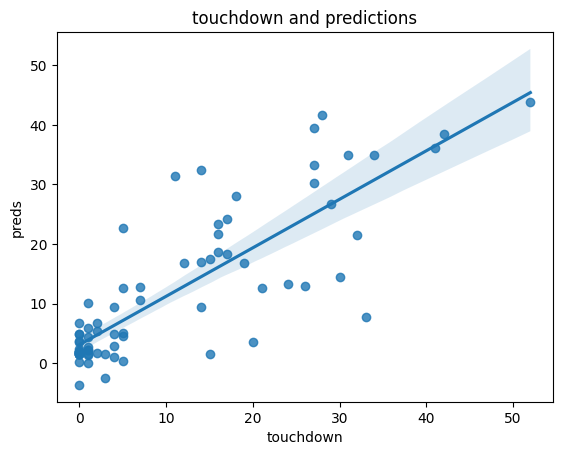

In [14]:
# Regardons un apercu de tous ca
sns.regplot(data=test_data, x='touchdown', y='preds')
plt.title('touchdown and predictions')
plt.show()

**Notre prédiction final du top 10 des quarterbacks avec le plus de touchdown lancer pour la saison 2023 de NFL**




In [15]:
test_data.loc[:, ['season', 'passer_id', 'passer', 'touchdown', 'preds']].sort_values('touchdown', ascending=False).head(10)

,season,passer_id,passer,touchdown,preds
296,2022,00-0033873,P.Mahomes,52.0,43.773075
338,2022,00-0036442,J.Burrow,42.0,38.465752
310,2022,00-0034857,J.Allen,41.0,36.171686
262,2022,00-0029604,K.Cousins,34.0,34.953044
265,2022,00-0030565,G.Smith,33.0,7.799100
284,2022,00-0033106,J.Goff,32.0,21.522589
283,2022,00-0033077,D.Prescott,31.0,34.999742
345,2022,00-0036971,T.Lawrence,30.0,14.429281
336,2022,00-0036389,J.Hurts,29.0,26.656970
247,2022,00-0023459,A.Rodgers,28.0,41.606350
